In [1]:
import matplotlib.pyplot as plt
import numpy as np

from project_classes import *
from functions import *
from iceflow_library import *

In [2]:
# dir = 'C:\\Users\\rj\\Documents\\cresis\\rds\\2016_Antarctica_DC8\\CSARP_layer\\20161024_05\\'
dir = 'C:\\Users\\rj\\Desktop\\cresis_data_II\\rds\\2016_Antarctica_DC8\\CSARP_layer\\20161024_05\\'

print(dir)
os.listdir(dir)

C:\Users\rj\Desktop\cresis_data_II\rds\2016_Antarctica_DC8\CSARP_layer\20161024_05\


['Data_20161024_05_001.mat',
 'Data_20161024_05_002.mat',
 'Data_20161024_05_003.mat',
 'Data_20161024_05_004.mat',
 'Data_20161024_05_005.mat',
 'Data_20161024_05_006.mat',
 'Data_20161024_05_007.mat',
 'Data_20161024_05_008.mat',
 'Data_20161024_05_009.mat',
 'Data_20161024_05_010.mat',
 'Data_20161024_05_011.mat',
 'Data_20161024_05_012.mat',
 'Data_20161024_05_013.mat',
 'Data_20161024_05_014.mat',
 'Data_20161024_05_015.mat',
 'Data_20161024_05_016.mat',
 'Data_20161024_05_017.mat',
 'Data_20161024_05_018.mat',
 'Data_20161024_05_019.mat',
 'Data_20161024_05_020.mat',
 'Data_20161024_05_021.mat',
 'Data_20161024_05_022.mat',
 'Data_20161024_05_023.mat',
 'Data_20161024_05_024.mat',
 'Data_20161024_05_025.mat',
 'Data_20161024_05_026.mat',
 'Data_20161024_05_027.mat',
 'Data_20161024_05_028.mat',
 'Data_20161024_05_029.mat',
 'Data_20161024_05_030.mat',
 'Data_20161024_05_031.mat',
 'Data_20161024_05_032.mat',
 'Data_20161024_05_033.mat',
 'Data_20161024_05_034.mat',
 'Data_2016102

In [3]:
segment_data_file = 'Data_20161024_05_'

startframe = '001'
# endframe = '015'
# endframe = the number of files in the directory
files = os.listdir(dir)
endframe = str(len(files) - 1).zfill(3)

# data_mat = np.array([sio.loadmat(dir + segment_data_file + str(i).zfill(3) + '.mat')
#                      for i in range(int(startframe), int(endframe)+1)])

In [4]:
import h5py

In [5]:
# use the h5py library to read the data
# f = h5py.File(dir + segment_data_file + '001.mat', 'r')

In [6]:
# get the keys of the file
# list(f.keys())
flight = '20161024_05'

segment_data_file = 'Data_' + flight + '_'
layer_attributes_file = 'layer_' + flight + '.mat'

startframe = '001'
# endframe = the number of files in the directory
files = os.listdir(dir)
endframe = str(len(files) - 1).zfill(3)
print(f"endframe: {endframe}")

# load an array of mat files
# data_mat = []
# for i in range(int(startframe), int(endframe)+1):
#     f = h5py.File(dir + segment_data_file + str(0).zfill(3) + '.mat', 'r')
# f = h5py.File(dir + segment_data_file + '001.mat', 'r')


data_mat = []
for i in range(int(startframe), int(endframe)+1):
    f = h5py.File(dir + segment_data_file + str(i).zfill(3) + '.mat', 'r')
    data_mat.append(f)
elevation = np.array([])
# elevation = np.append(elevation, data_mat['elev'])
print((data_mat[43]['elev']))

endframe: 044
<HDF5 dataset "elev": shape (3442, 1), type "<f8">


### **TODO: 16Apr24**
- look at what ChatGPT said, I'm too tired to implement it
- **move the list definitions up above the h5py reading call**
    - define empty lists
    - in the loop, read the file f
    - in the loop append each list in f to the relevant list
    - in the end you have continuous lists
    - then you pickle them or whatever **

In [7]:
# def mat_pickler_h5py(season, flight, testing_mode=False, readout=False, save=True, plot_layer=False):
#     print("Reading data files...")
#     print("--------------------")
#     # set the directory, segment data file, layer attributes file, and start and end frames
#     if testing_mode:
#         # the dir is the current directory + the test_data folder
#         dir = os.getcwd() + '\\test_data\\' + flight + '\\'
#     else:
#         # TODO: refactor this into a try except block, maybe upstream of this function where it is called
#         dir = ('C:\\Users\\rj\\Documents\\cresis\\rds\\' + season + '\\CSARP_layer\\' + flight + '\\')
# 
#     data_file = dir + 'Data_' + flight + '_'
#     attributes_file = dir + 'layer_' + flight    
#     layers = layerize_h5py(data_file, attributes_file)
# 
#     if readout:
#         print("--------------------", end="")
#         for layer in layers:
#             print(f"\n{layer.layer_name} number of points: {layer.twtt.shape[0]}")
#             print(f"{layer.layer_name} twtt first three: {layer.twtt[:3].tolist()} ")
#             print(f"{layer.layer_name} twtt last three: {layer.twtt[-3:].tolist()} ")
#         print("--------------------\n")
#     
#     if save:
#         # save layers to a pickle file
#         # print("Saving layers to a pickle file...")
#         print("--------------------")
#         # list current directory
#         # print(f"Current directory: {}")
#         directory = os.getcwd() + "\\pickle_jar\\"
#         # file_name = directory + "layer_export" + attributes_file[5:-4] + ".pickle"
#         file_name = directory + "layer_export_" + flight + ".pickle"
#         pickle.dump(layers, open(file_name, "wb"))
#         print(file_name, " saved in local directory of this python file.")
#         print("--------------------\n")
# 
#     if plot_layer:
#         # plot the layers
#         print("Plotting layers...")
#         print("--------------------")
#         # plot the layer depths vs gps time for each layer on the same plot
#         for layer in layers:
#             plt.plot(layer.gps_time, layer.twtt, label=layer.layer_name)
#         plt.xlabel("GPS Time")
#         plt.ylabel("Two Way Travel Time (ns)")
#         # invert the y axis so that the plot is right side up
#         plt.gca().invert_yaxis()
#         plt.title("Elevation vs GPS Time")
#         plt.legend()
# 
#         plt.show()
#         print("--------------------\n")
#         
# 
# def layerize_h5py(data_file, attribute_file):
#     # TODO: add a docstring
#     # TODO: add a portion to pull the layer name out of the attribute file
#         # afai can tell, that is all the attribute file is used for in the original code
#     # create an empty list to store the layers
#     layers = []
#     files = os.listdir(dir)  # list of files in the directory
#     startframe = '001'  # the first file number in the directory
#     endframe = str(len(files) - 1).zfill(3)  # the number of files in the directory
#     attribute_mat = h5py.File(attribute_file + '.mat', 'r')
# 
#     decimal1 = attribute_mat[np.array([attribute_mat['lyr_name'][0][0]])[0]]
#     decimal1_name = [decimal1[i][0] for i in range(len(decimal1))]  # a list of unicode values of the characters
#     decimal2 = attribute_mat[np.array([attribute_mat['lyr_name'][1][0]])[0]]
#     decimal2_name = [decimal2[i][0] for i in range(len(decimal2))]  # a list of unicode values of the characters
#     name1 = ''.join(chr(i) for i in decimal1_name)  # convert the unicode values to a string
#     name2 = ''.join(chr(i) for i in decimal2_name)  # convert the unicode values to a string
#     
#     layer1_name = name1
#     layer2_name = name2
#         
# 
#     f = h5py.File(data_file + str(3).zfill(3) + '.mat', 'r')
#     # print the contents of the 'param' key
#     print(f"f['param']: {f['param']}")
#     print(f"f['param'].keys(): {list(f['param'].keys())}")
# 
#     filename = data_file + '001.mat' # fill the data which doesn't change per point
#     # param = []  # will need some debugging and we probably don't care about it
#     layer1_quality = []
#     layer2_quality = []
#     layer1_type = []
#     layer2_type = []
#     
#     layer1_quality.append(f['quality'][0])
#     layer2_quality.append(f['quality'][1])
#     layer1_type.append(f['type'][0])
#     layer2_type.append(f['type'][1])
#     
#     # initialize the data that will be loaded from the files
#     gps_time = []
#     layer1_id = []
#     layer2_id = []
#     lat = []
#     lon = []
#     layer1_twtt = []
#     layer2_twtt = []
#     
#     # Load data from each file
#     for i in range(int(startframe), int(endframe)+1):
#         filename = data_file + str(i).zfill(3) + '.mat'
#         with h5py.File(filename, 'r') as f:
#             gps_time.append(f['gps_time'][:])
#             layer1_id.append(f['id'][0])
#             layer2_id.append(f['id'][1])
#             lat.append(f['lat'][:])
#             lon.append(f['lon'][:])
#             # param.append(f['param'])
#             # layer1_quality.append(f['quality'][0])
#             # layer2_quality.append(f['quality'][1])
#     
#             # Extract twtt columns directly into layer1_twtt and layer2_twtt
#             twtt_data = f['twtt'][:]
#             layer1_twtt.extend(twtt_data[:, 0])
#             layer2_twtt.extend(twtt_data[:, 1])
# 
#  
#     # Convert lists to numpy arrays
#     gps_time = np.concatenate(gps_time)
#     lat = np.concatenate(lat)
#     lon = np.concatenate(lon)
#     # param = np.concatenate(param)
#     layer1_twtt = np.array(layer1_twtt)
#     layer2_twtt = np.array(layer2_twtt)
#     
#     # Convert lists to numpy arrays
#     layer1_id = np.array(layer1_id)
#     layer2_id = np.array(layer2_id)
#     layer1_quality = np.array(layer1_quality)
#     layer2_quality = np.array(layer2_quality)
#     layer1_type = np.array(layer1_type)
#     layer2_type = np.array(layer2_type)
#     
#     # create a layer object
#     layer1 = Layer(layer1_name, gps_time, layer1_id, lat, lon, layer1_quality, layer1_twtt, layer1_type)
#     layer2 = Layer(layer2_name, gps_time, layer2_id, lat, lon, layer2_quality, layer2_twtt, layer2_type)
#     
#     # append the layer to the layers list
#     layers.append(layer1)
#     layers.append(layer2)
#     print(f"layer1: {layer1.layer_name} number of points: {layer1.twtt.shape[0]}")
#     print(f"layer2: {layer2.layer_name} number of points: {layer2.twtt.shape[0]}")
#     
#     return layers

Reading data files...
--------------------
f['param']: <HDF5 group "/param" (6 members)>
f['param'].keys(): ['day_seg', 'radar', 'radar_name', 'records', 'season_name', 'sw_version']
layer1: Surface number of points: 146779
layer2: Bottom number of points: 146779
--------------------
C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_20161024_05.pickle  saved in local directory of this python file.
--------------------

Plotting layers...
--------------------


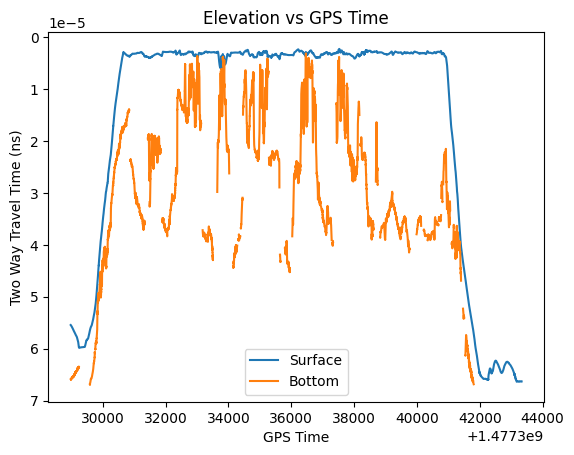

--------------------


In [8]:
mat_pickler_h5py('2016_Antarctica_DC8', '20161024_05', testing_mode=False, readout=False, save=True, plot_layer=True)

In [149]:
data_file = dir + 'Data_' + flight + '_'
f = h5py.File(data_file + str(3).zfill(3) + '.mat', 'r')
# print the contents of the 'param' key
print(f"f['quality']: {f['quality'][1]}")


f['quality']: [1 1]


In [141]:
print(f['elev'])
print(f['file_type'])
print(f['file_version'])
print(f['gps_time'])
print(f['id'])
print(f['lat'])
print(f['lon'])
print(f['param'])
print(f['quality'])
print(f['twtt'])
print(f['type'])

<HDF5 dataset "elev": shape (3334, 1), type "<f8">
<HDF5 dataset "file_type": shape (5, 1), type "<u2">
<HDF5 dataset "file_version": shape (1, 1), type "<u2">
<HDF5 dataset "gps_time": shape (3334, 1), type "<f8">
<HDF5 dataset "id": shape (2, 1), type "<f8">
<HDF5 dataset "lat": shape (3334, 1), type "<f8">
<HDF5 dataset "lon": shape (3334, 1), type "<f8">
<HDF5 group "/param" (6 members)>
<HDF5 dataset "quality": shape (3334, 2), type "|u1">
<HDF5 dataset "twtt": shape (3334, 2), type "<f8">
<HDF5 dataset "type": shape (3334, 2), type "|u1">


In [29]:
"""
15Apr24 version of mat_pickler_h5py
"""

# def mat_pickler_h5py(season, flight, testing_mode=False, readout=False, save=True, plot_layer=False):
#     print("Reading data files...")
#     print("--------------------")
#     segment_data_file = 'Data_' + flight + '_'
#     layer_attributes_file = 'layer_' + flight + '.mat'
#     
#     # set the directory, segment data file, layer attributes file, and start and end frames
#     if testing_mode:
#         # the dir is the current directory + the test_data folder
#         dir = os.getcwd() + '\\test_data\\' + flight + '\\'
#         
#             # dir = ('test_data') + '\\'
#             # contains all of the actual data such as twtt, lat, lon, etc.
#             # contains the attributes of the layer such as name, param, etc.
#     else:
#         # TODO: refactor this into a try except block, maybe upstream of this function where it is called
#         dir = ('C:\\Users\\rj\\Documents\\cresis\\rds\\' + season + '\\CSARP_layer\\' + flight + '\\')
#         #     # leaving because it might actually be good. the below line works for 2018_Antarctica_DC8 at least as it
#         #     # has the CSARP_layerData folder instead of CSARP_layer.
#     
#         # contains all of the actual data such as twtt, lat, lon, etc.
#         # contains the attributes of the layer such as name, param, etc.
#         # print(f"layer_attributes_file: {layer_attributes_file}")
#     # contains the attributes of the layer such as name, param, etc.
#     
#     startframe = '001'
#     # endframe = '015'
#     # endframe = the number of files in the directory
#     files = os.listdir(dir)
#     endframe = str(len(files) - 1).zfill(3)
#     
#     # load an array of mat files
#     data_mat = []
#     for i in range(int(startframe), int(endframe)+1):
#         f = h5py.File(dir + segment_data_file + str(i).zfill(3) + '.mat', 'r')
#         data_mat.append(f)
# 
#     
#     # print(f"size of f: {len(f)}")
#     # print(f"size of data_mat: {len(data_mat)}")
#     # print(f"first 3 elev in f: {f['elev'][:3]}")
#     # print(f"first 3 elev in data_mat: {data_mat[0]['elev'][:3]}")
#     
#     attribute_mat = h5py.File(dir + layer_attributes_file, 'r')
# 
#     layers = layerize_h5py(data_mat, attribute_mat)
# 
#     if readout:
#         print("--------------------", end="")
#         for layer in layers:
#             print(f"\n{layer.layer_name} number of points: {layer.twtt.shape[0]}")
#             print(f"{layer.layer_name} twtt first three: {layer.twtt[:3].tolist()} ")
#             print(f"{layer.layer_name} twtt last three: {layer.twtt[-3:].tolist()} ")
#         print("--------------------\n")
#     
#     if save:
#         # save layers to a pickle file
#         # print("Saving layers to a pickle file...")
#         print("--------------------")
#         # list current directory
#         # print(f"Current directory: {}")
#         directory = os.getcwd() + "\\pickle_jar\\"
#         file_name = directory + "layer_export" + layer_attributes_file[5:-4] + ".pickle"
#         pickle.dump(layers, open(file_name, "wb"))
#         print(file_name, " saved in local directory of this python file.")
#         print("--------------------\n")
# 
#     if plot_layer:
#         # plot the layers
#         print("Plotting layers...")
#         print("--------------------")
#         # plot the layer depths vs gps time for each layer on the same plot
#         for layer in layers:
#             plt.plot(layer.gps_time, layer.twtt, label=layer.layer_name)
#         plt.xlabel("GPS Time")
#         plt.ylabel("Two Way Travel Time (ns)")
#         plt.title("Elevation vs GPS Time")
#         plt.legend()
# 
#         plt.show()
#         print("--------------------\n")
#         
# def layerize_h5py(data_mat, attribute_mat):
#     # TODO: add a docstring
#     # TODO: add a portion to pull the layer name out of the attribute file
#         # afai can tell, that is all the attribute file is used for in the original code
#     # create an empty list to store the layers
#     layers = []
#     
#     print(f"attribute_mat keys: {list(attribute_mat.keys())}")
#     # print(f"attribute_mat['lyr_name']: {attribute_mat['lyr_name']}")
# 
#     # iterate through the data_mat
#     # for i in range(2):
#     #     layer_name = "layer_" + str(i)
#     #     elevation = np.array([])
#     #     gps_time = np.array([])
#     #     id = np.array([])
#     #     lat = np.array([])
#     #     lon = np.array([])
#     #     param = np.array([])
#     #     quality = np.array([])
#     #     twtt = np.array([])
#     #     layer_type = np.array([])
#     #     for data in data_mat:
#     #         elevation = np.append(elevation, data['elev'])
#     #         gps_time = np.append(gps_time, data['gps_time'])
#     #         id = np.append(id, data['id'])
#     #         lat = np.append(lat, data['lat'])
#     #         lon = np.append(lon, data['lon'])
#     #         param = np.append(param, data['param'])
#     #         quality = np.append(quality, data['quality'])
#     #         twtt = np.append(twtt, data['twtt'])
#     #         layer_type = np.append(layer_type, data['type'])
#     
#         #     layers.append(Layer(layer_name, gps_time, id, lat, lon, param, quality, twtt, type, elevation))
#         # print(f"Layer {i} created.")
#     id = 0 # layer id number (0 or 1)
# 
#     decimal1 = attribute_mat[np.array([attribute_mat['lyr_name'][0][0]])[0]]
#     decimal_name1 = [decimal1[i][0] for i in range(len(decimal1))]
#     
#     decimal2 = attribute_mat[np.array([attribute_mat['lyr_name'][1][0]])[0]]
#     decimal_name2 = [decimal2[i][0] for i in range(len(decimal2))]
#     # print(''.join(chr(i) for i in decimal_name1))
#     layer1_name = ''.join(chr(i) for i in decimal_name1)
#     layer2_name = ''.join(chr(i) for i in decimal_name2)
#     print(f"layer1_name: {layer1_name}")
#     print(f"layer2_name: {layer2_name}")
#     elevation = np.array([])
#     gps_time = np.array([])
#     layer1_id = np.array([])
#     layer2_id = np.array([])
#     lat = np.array([])
#     lon = np.array([])
#     param = np.array([])
#     layer1_quality = np.array([])
#     layer2_quality = np.array([])
#     layer1_twtt = np.array([])
#     layer2_twtt = np.array([])
#     layer1_type = np.array([])
#     layer2_type = np.array([])
#     
#     # for i in range(len(f['elev'])):
#     #     # get the data from the data_mat
#     #     elevation = np.append(elevation, f['elev'][i])
#     #     gps_time = np.append(gps_time, f['gps_time'][i])
#     #     layer1_id = np.append(layer1_id, f['id'][0])
#     #     layer2_id = np.append(layer2_id, f['id'][1])
#     #     lat = np.append(lat, f['lat'][i])
#     #     lon = np.append(lon, f['lon'][i])
#     #     param = np.append(param, f['param'])
#     #     layer1_quality = np.append(layer1_quality, f['quality'][0])
#     #     layer2_quality = np.append(layer2_quality, f['quality'][1])
#     #     layer1_twtt = np.append(layer1_twtt, f['twtt'][0])
#     #     layer2_twtt = np.append(layer2_twtt, f['twtt'][1])
#     #     layer1_type = np.append(layer1_type, f['type'][0])
#     #     layer2_type = np.append(layer2_type, f['type'][1])        
#     
#     print(f"\n\ndata_mat['elev'][0]: {data_mat[0]['elev']}\n\n")
#     length = data_mat[0]['elev'].shape[0]
#     for i in range(length):
#         # get the data from the data_mat
#         elevation = np.append(elevation, data_mat['elev'][i])
#         gps_time = np.append(gps_time, data_mat['gps_time'][i])
#         layer1_id = np.append(layer1_id, data_mat['id'][0])
#         layer2_id = np.append(layer2_id, data_mat['id'][1])
#         lat = np.append(lat, data_mat['lat'][i])
#         lon = np.append(lon, data_mat['lon'][i])
#         param = np.append(param, data_mat['param'])
#         layer1_quality = np.append(layer1_quality, data_mat['quality'][0])
#         layer2_quality = np.append(layer2_quality, data_mat['quality'][1])
#         layer1_twtt = np.append(layer1_twtt, data_mat['twtt'][0])
#         layer2_twtt = np.append(layer2_twtt, data_mat['twtt'][1])
#         layer1_type = np.append(layer1_type, data_mat['type'][0])
#         layer2_type = np.append(layer2_type, data_mat['type'][1])   
#     
#     # print the size of gps_time and twtt
#     print(f"gps_time size: {gps_time.shape}")
#     print(f"twtt size: {layer1_twtt.shape}")
#     
#     
#     # create a layer object
#     layer1 = Layer(layer1_name, gps_time, layer1_id, lat, lon, param, layer1_quality, layer1_twtt, layer1_type, elevation)
#     
#     layer2 = Layer(layer2_name, gps_time, layer2_id, lat, lon, param, layer2_quality, layer2_twtt, layer2_type, elevation)
#     
#     # append the layer to the layers list
#     layers.append(layer1)
#     layers.append(layer2)
#     print(f"layer1: {layer1.layer_name} number of points: {layer1.twtt.shape[0]}")
#     print(f"layer2: {layer2.layer_name} number of points: {layer2.twtt.shape[0]}")
#     
#     return layers
# 
# def helper(mat, input1, index1, index2=None, index3=None):
#     # decimal2 = attribute_mat[np.array([attribute_mat['lyr_name'][1][0]])[0]]
#     # decimal_name2 = [decimal2[i][0] for i in range(len(decimal2))]
#     if index2:
#         mat_content = mat[np.array(mat[input][index1])[index2]]
#     if index3:
#         mat_content = mat[np.array(mat[input1][index1][index2])[index3]]
#     else:
#         mat_content = mat[np.array(mat[input1])]
#     mat_name = [mat_content[i][0] for i in range(len(mat_content))]
#     return mat_name

In [50]:
flight = '20161024_05'
layer_attributes_file = 'layer_' + flight + '.mat'

attribute_mat = h5py.File(dir + layer_attributes_file, 'r')

In [51]:
print(f"attribute_mat keys: {list(attribute_mat.keys())}")

attribute_mat keys: ['#refs#', 'file_type', 'file_version', 'lyr_age', 'lyr_age_source', 'lyr_desc', 'lyr_group_name', 'lyr_id', 'lyr_name', 'lyr_order', 'param']


In [59]:
print(f"attribute_mat['lyr_name']: {attribute_mat['lyr_name'][1]}")

attribute_mat['lyr_name']: [<HDF5 object reference>]


In [99]:
bob = np.array([attribute_mat['lyr_name'][0][0]])

In [100]:
print(bob)

[<HDF5 object reference>]


In [101]:
bob.shape

(1,)

In [151]:
print(bob[0])
print(attribute_mat[bob[0]])

# attribute_mat[bob[0]] is of type <HDF5 dataset "h": shape (7, 1), type "<u2">
# print the contents of the dataset
for i in range(7):
    print(attribute_mat[bob[0]][i][0])

# name is a list of the contents of the dataset
deci_name = [attribute_mat[bob[0]][i][0] for i in range(7)]
# convert name to a string using chr
name = ''.join(chr(i) for i in deci_name)
print(name)

<HDF5 object reference>
<HDF5 dataset "h": shape (7, 1), type "<u2">
115
117
114
102
97
99
101
surface


In [170]:
id = 0 # layer id number (0 or 1)

decimal = attribute_mat[np.array([attribute_mat['lyr_name'][id][0]])[0]]
decimal_name = [decimal[i][0] for i in range(len(decimal))]
name = ''.join(chr(i) for i in decimal_name)
print(name)

surface
